## A CLASSIFICATION PROJECT - PREDICTING EMPLOYEE ATTRITION

#### BUSINESS UNDERSTANDING

Employee attrition refers to the process where employees leave an organization, either voluntarily or involuntarily. High attrition rates can be costly for businesses, as they impact productivity, morale, recruitment costs, and training expenses. 
The primary objective of predicting employee attrition is to identify employees who are at risk of leaving the organization in the near future. By doing so, companies can take proactive measures to improve retention, enhance employee satisfaction, and reduce the overall cost of turnover.

##### PROJECT GOAL
The goal of this project is to develop a robust machine learning pipeline to predict whether specific employees are likely to leave the company. The predictive modeling will be conducted following an in-depth analysis of the dataset obtained. 

##### ANALYTICAL QUESTIONS
1. What is the percentage of Attrition?
2. How satisfied are employees after 3 years at the company?
3. Does marital status affect attrition rate?

#### DATA UNDERSTANDING

#### Data Features
* Age: Age of employees

* Attrition: Employee attrition status

* Department: Department of employees

* Education Level: 1-Bachelor's degree; 2- Master's degree

* EducationField

* Environment Satisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;

* Job Satisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;

* MaritalStatus

* Gross Salary

* Work Life Balance: 1-Bad; 2-Good; 3-Better; 4-Best;

* Length of Service: number of years with employer


#### Loading the Necessary Libraries

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Data Preparation
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

#Model Persistance
import joblib

In [82]:
#Load the dataset
data = pd.read_excel('Data/Attrition Dataset.xlsx')
data.head()

,Employee ID,Age,Department,Education Level,EducationField,Environment Satisfaction,Job Satisfaction,Marital Status,Gross Salary,Work Life Balance,Length of Service,Attrition
0,1001,41,Personal Finance,2,Finance,2,4,Single,5993.0,1,6,Yes
1,1002,37,Personal Finance,1,Finance,4,3,Single,2090.0,3,7,Yes
2,1003,33,Personal Finance,1,Finance,4,3,Married,2909.0,3,8,No
3,1004,27,Personal Finance,1,Finance,1,2,Married,3468.0,3,2,No
4,1005,32,Personal Finance,1,Finance,4,4,Single,3068.0,2,7,Yes


In [83]:
#Check cell values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               302 non-null    int64  
 1   Age                       302 non-null    int64  
 2   Department                302 non-null    object 
 3   Education Level           302 non-null    int64  
 4   EducationField            302 non-null    object 
 5   Environment Satisfaction  302 non-null    int64  
 6   Job Satisfaction          302 non-null    int64  
 7   Marital Status            302 non-null    object 
 8   Gross Salary              299 non-null    float64
 9   Work Life Balance         302 non-null    int64  
 10  Length of Service         302 non-null    int64  
 11  Attrition                 302 non-null    object 
dtypes: float64(1), int64(7), object(4)
memory usage: 28.4+ KB


* All the columns have the correct data type.

In [84]:
#Check for null values
data.isna().sum()

Employee ID                 0
Age                         0
Department                  0
Education Level             0
EducationField              0
Environment Satisfaction    0
Job Satisfaction            0
Marital Status              0
Gross Salary                3
Work Life Balance           0
Length of Service           0
Attrition                   0
dtype: int64

#### Observations
* Most of the columns in the dataset do not have missing values.
* The column "Gross Salary" has 3 missing values, meaning that there are 3 records where the "Gross Salary" information is not provided. These will be handled using imputation.

In [85]:
#Remove the Employee ID column
data = data.drop('Employee ID', axis=1)

In [86]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,302.0,32.324503,5.047350,21.0,29.0,32.0,36.0,53.0
Education Level,302.0,1.066225,0.249088,1.0,1.0,1.0,1.0,2.0
Environment Satisfaction,302.0,2.688742,1.070197,1.0,2.0,3.0,4.0,4.0
Job Satisfaction,302.0,2.847682,1.070587,1.0,2.0,3.0,4.0,4.0
Gross Salary,299.0,5163.217391,3393.744928,1009.0,2703.0,4200.0,6372.0,19272.0
Work Life Balance,302.0,2.774834,0.688512,1.0,2.0,3.0,3.0,4.0
Length of Service,302.0,4.271523,2.719277,1.0,2.0,4.0,6.0,13.0


In [87]:
data.describe(include='object').T

,count,unique,top,freq
Department,302,13,Tech Department,39
EducationField,302,8,Finance,84
Marital Status,302,2,Married,157
Attrition,302,2,No,156


In [88]:
#Check for duplicates
data.duplicated().sum()

np.int64(0)

* This implies there are no duplicates in the dataset

In [89]:
# Print unique values for each column
for column in data.columns:
    print(f'Column Name: {column}\n')
    print(f'Number of Unique Values: {data[column].unique().size}\n')
    print(f'{data[column].unique()}')
    print('=' * 80)

Column Name: Age

Number of Unique Values: 27

[41 37 33 27 32 30 38 36 35 29 31 34 28 22 53 24 21 46 39 50 26 23 40 25
 43 45 42]
Column Name: Department

Number of Unique Values: 13

['Personal Finance' 'Tech Department' 'Brokerage' 'Management'
 'Client Services' 'Legal and Admin' 'Customer Service' 'Portfolio'
 'Human Resource' 'Marketing Department' 'Human Resources'
 'Strategic Initiatives' 'Relationship Mgt']
Column Name: Education Level

Number of Unique Values: 2

[2 1]
Column Name: EducationField

Number of Unique Values: 8

['Finance' 'Computer Science' 'Business Mgt' 'Business Admin' 'Law'
 'Social Science' 'Human Resources' 'Marketing']
Column Name: Environment Satisfaction

Number of Unique Values: 4

[2 4 1 3]
Column Name: Job Satisfaction

Number of Unique Values: 4

[4 3 2 1]
Column Name: Marital Status

Number of Unique Values: 2

['Single' 'Married']
Column Name: Gross Salary

Number of Unique Values: 290

[ 5993.  2090.  2909.  3468.  3068.  2693.  9526.  5237.  242

In [90]:
#Convert column names to lower case
data.columns = data.columns.str.lower()

#Check the columns to confirm
column_names = data.columns
print(column_names)

Index(['age', 'department', 'education level', 'educationfield',
       'environment satisfaction', 'job satisfaction', 'marital status',
       'gross salary', 'work life balance', 'length of service', 'attrition'],
      dtype='object')


In [91]:
#Merge column names
data.columns = data.columns.str.replace(' ', '_')

# Check the new column names
print(data.columns)

Index(['age', 'department', 'education_level', 'educationfield',
       'environment_satisfaction', 'job_satisfaction', 'marital_status',
       'gross_salary', 'work_life_balance', 'length_of_service', 'attrition'],
      dtype='object')


In [92]:
#Rename educationfield column
data.rename(columns={'educationfield': 'education_field'}, inplace=True)

# Check the updated column names
print(data.columns)

Index(['age', 'department', 'education_level', 'education_field',
       'environment_satisfaction', 'job_satisfaction', 'marital_status',
       'gross_salary', 'work_life_balance', 'length_of_service', 'attrition'],
      dtype='object')


#### Univariate Analysis

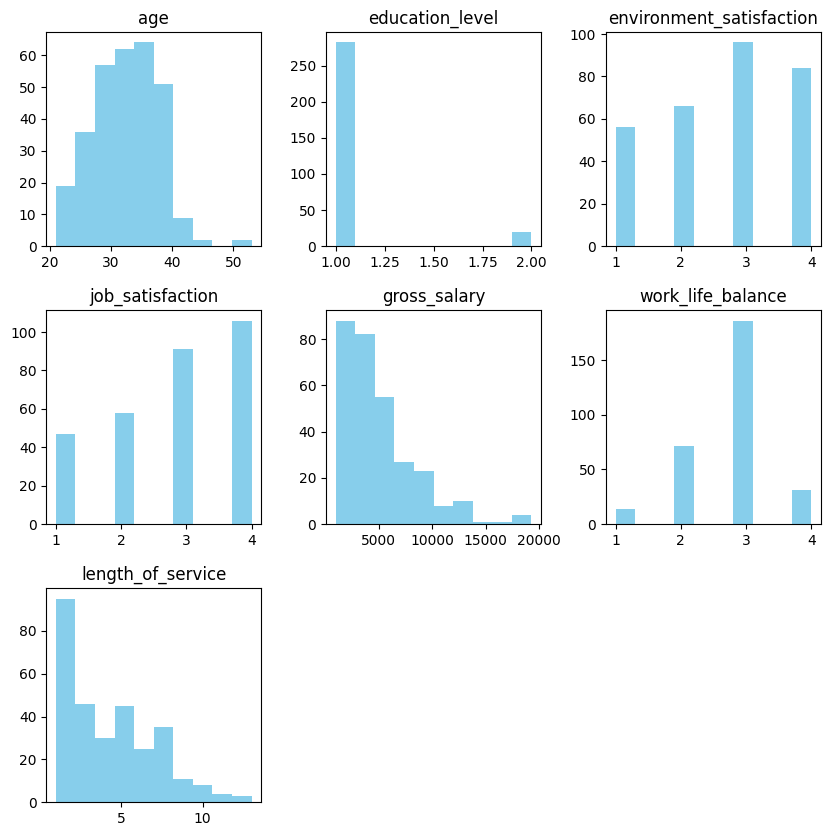

In [93]:
#setting color palette for the project
sns.color_palette("pastel")
data.hist(figsize=(10, 10), grid=False, color='skyblue')
plt.show()

* Add KDE plots to see a smoother representation of the distribution of the features

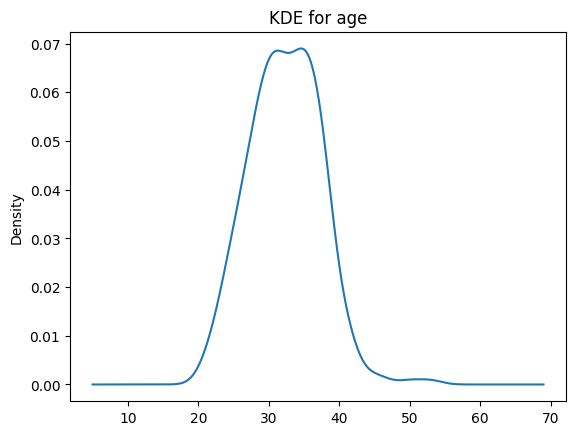

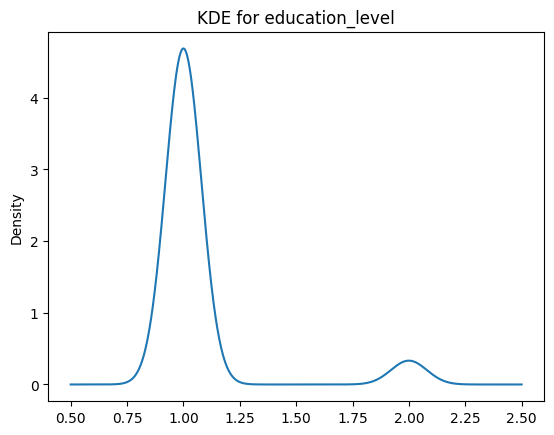

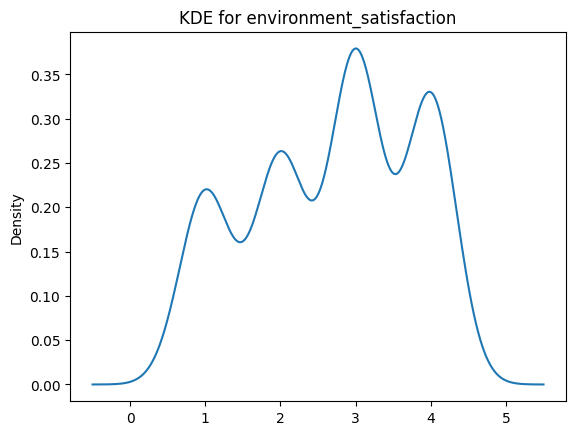

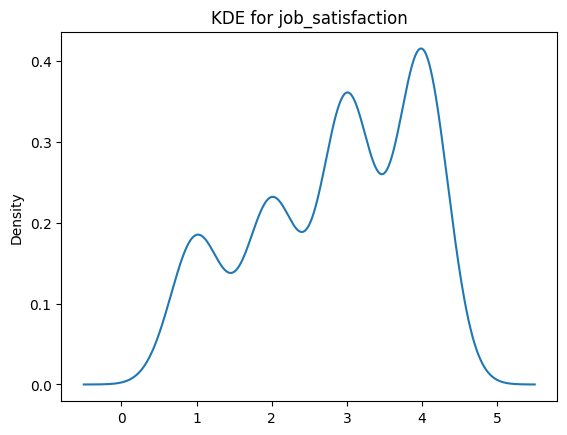

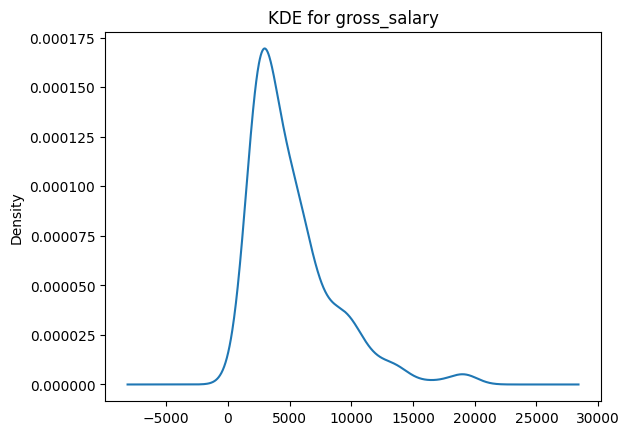

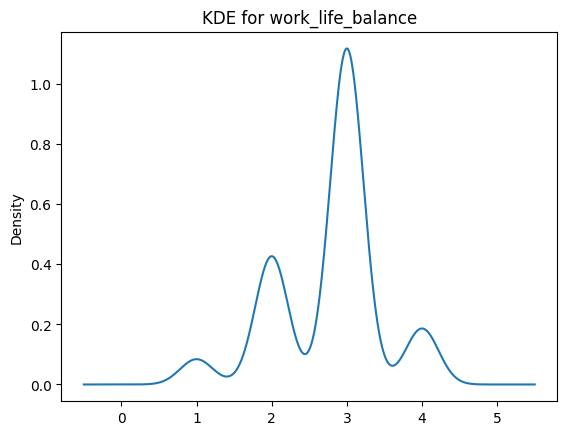

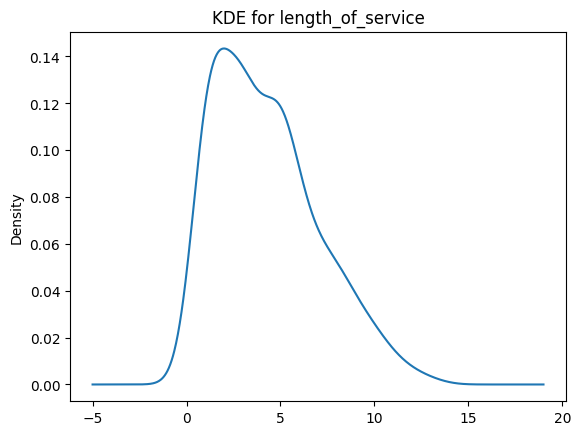

In [94]:
for column in data.select_dtypes('number').columns:
    data[column].plot(kind='kde')
    plt.title(f'KDE for {column}')
    plt.show()

* Add a Boxplot to detect outliers and the scale of the data

<Axes: >

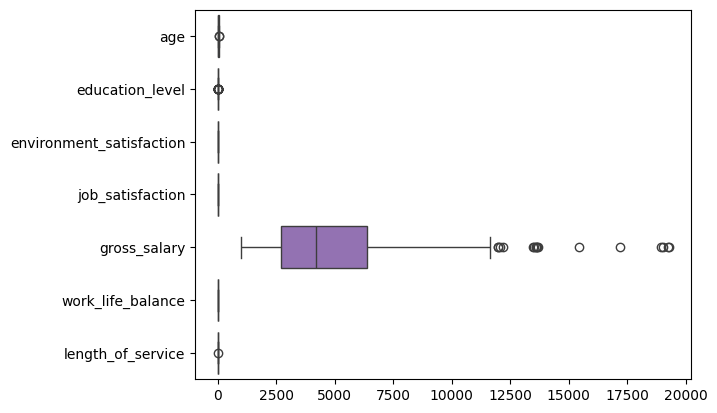

In [95]:
sns.boxplot(data=data, orient='h')

* Points above the upper whisker indicate salaries much higher than typical, suggesting significant variation in gross salaries within the dataset.

#### Bi-variate Analysis

In [96]:
correlation = data.corr(numeric_only=True)
correlation

,age,education_level,environment_satisfaction,job_satisfaction,gross_salary,work_life_balance,length_of_service
age,1.000000,0.355444,-0.019372,0.033155,0.395338,0.079411,0.507445
education_level,0.355444,1.000000,0.040195,0.025494,0.276792,-0.028993,0.140130
environment_satisfaction,-0.019372,0.040195,1.000000,0.048373,-0.082508,0.017289,-0.032509
job_satisfaction,0.033155,0.025494,0.048373,1.000000,-0.006306,-0.051190,0.045066
gross_salary,0.395338,0.276792,-0.082508,-0.006306,1.000000,0.043759,0.393477
work_life_balance,0.079411,-0.028993,0.017289,-0.051190,0.043759,1.000000,0.000823
length_of_service,0.507445,0.140130,-0.032509,0.045066,0.393477,0.000823,1.000000


<Axes: >

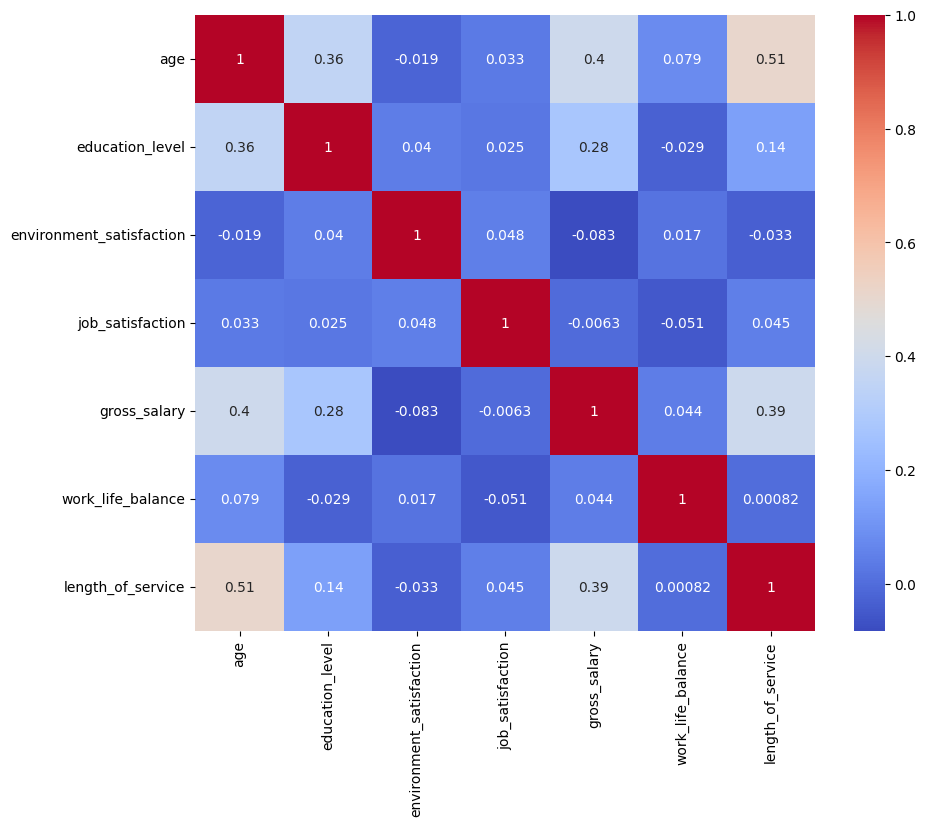

In [97]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation, annot=True, cmap='coolwarm')

#### Multivariate Analysis

<Figure size 1600x800 with 0 Axes>

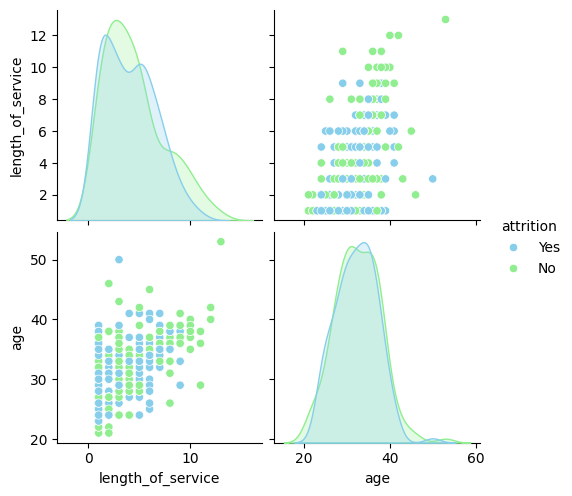

In [100]:
df = data[['attrition', 'length_of_service', 'age']]
plt.figure(figsize=(16, 8))
sns.pairplot(df, hue='attrition', palette={'Yes': 'skyblue', 'No': 'lightgreen'})
plt.show()

#### Answering Analytical Questions

1. What is the percentage of Attrition?

Text(0.5, 1.0, 'The Attrition distribution')

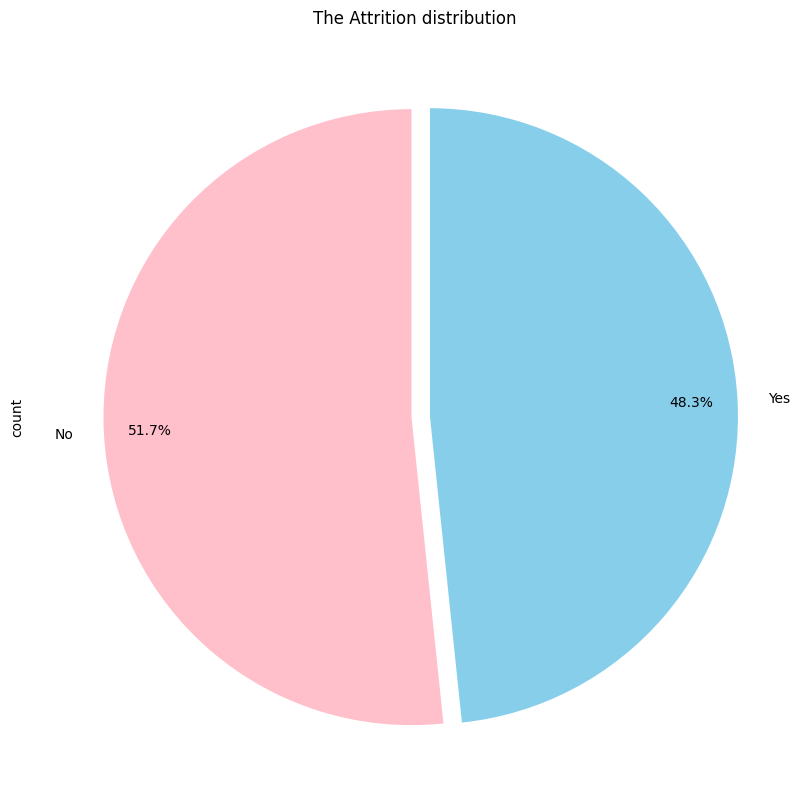

In [101]:
plt.figure(figsize=(10, 10))
data['attrition'].value_counts().plot.pie(startangle=90, colors=['pink', 'skyblue'], autopct='%1.1f%%', explode=(0.01, 0.05), pctdistance=0.85)
plt.title('The Attrition distribution')

#### How satisfied are employees after 3 years at the company?

In [102]:
data.columns

Index(['age', 'department', 'education_level', 'education_field',
       'environment_satisfaction', 'job_satisfaction', 'marital_status',
       'gross_salary', 'work_life_balance', 'length_of_service', 'attrition'],
      dtype='object')

In [104]:
data.groupby(['job_satisfaction', 'attrition'])['department'].count().rename('Total').reset_index()

,job_satisfaction,attrition,Total
0,1,No,16
1,1,Yes,31
2,2,No,32
3,2,Yes,26
4,3,No,41
5,3,Yes,50
6,4,No,67
7,4,Yes,39


In [105]:
after_three_years = data[data['length_of_service'] > 3]
after_three_years.shape

(161, 11)

In [106]:
after_three_years[['job_satisfaction', 'attrition']].groupby(['job_satisfaction', 'attrition'])['attrition'].count().rename('Count').reset_index()

,job_satisfaction,attrition,Count
0,1,No,6
1,1,Yes,18
2,2,No,15
3,2,Yes,17
4,3,No,23
5,3,Yes,24
6,4,No,41
7,4,Yes,17


#### Does marital status affect attrition rate?

In [107]:
import pandas as pd

# Assuming 'data' is your DataFrame
# Calculate the total count and attrition count by marital status
marital_status_summary = data.groupby('marital_status')['attrition'].value_counts().unstack().fillna(0)

# Calculate the attrition rate
marital_status_summary['attrition_rate'] = marital_status_summary['Yes'] / (marital_status_summary['Yes'] + marital_status_summary['No'])

# Reset index for better readability
marital_status_summary = marital_status_summary.reset_index()

print(marital_status_summary)

attrition marital_status  No  Yes  attrition_rate
0                Married  87   70        0.445860
1                 Single  69   76        0.524138


<Figure size 1000x600 with 0 Axes>

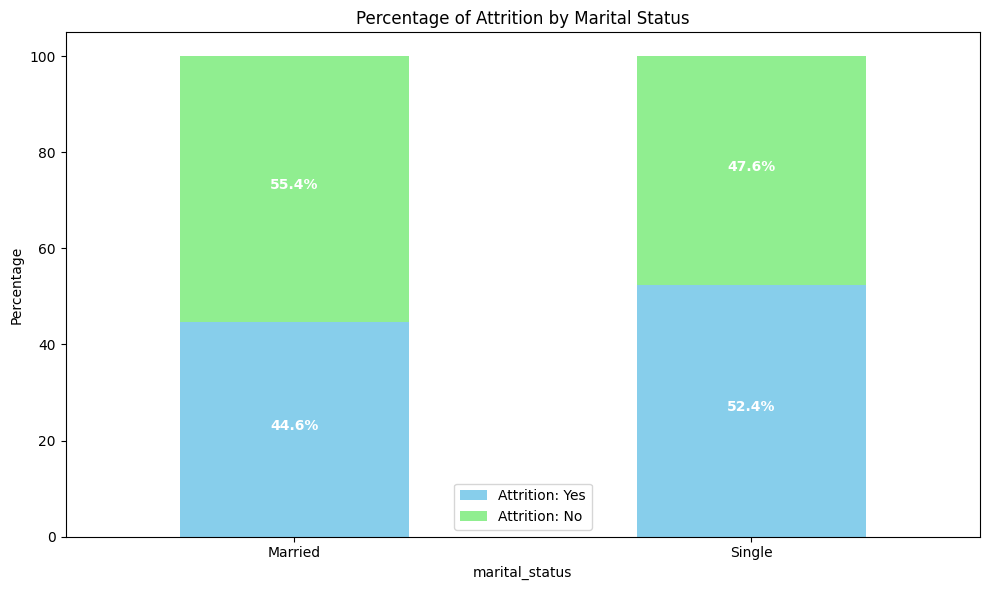

In [110]:
# Calculate the total count of attrition (Yes + No) for each marital status
marital_status_summary['Total'] = marital_status_summary['Yes'] + marital_status_summary['No']

# Calculate the percentage of Yes and No attrition
marital_status_summary['Yes_pct'] = marital_status_summary['Yes'] / marital_status_summary['Total'] * 100
marital_status_summary['No_pct'] = marital_status_summary['No'] / marital_status_summary['Total'] * 100

# Create a stacked bar chart to visualize the percentages of 'Yes' and 'No' attrition by marital status
plt.figure(figsize=(10, 6))
marital_status_summary[['Yes_pct', 'No_pct']].plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen'], figsize=(10, 6))

# Add percentage labels on each bar
for i in range(len(marital_status_summary)):
    plt.text(i, marital_status_summary['Yes_pct'].iloc[i] / 2, f"{marital_status_summary['Yes_pct'].iloc[i]:.1f}%", ha='center', color='white', fontweight='bold')
    plt.text(i, marital_status_summary['Yes_pct'].iloc[i] + marital_status_summary['No_pct'].iloc[i] / 2, f"{marital_status_summary['No_pct'].iloc[i]:.1f}%", ha='center', color='white', fontweight='bold')

plt.title('Percentage of Attrition by Marital Status')
plt.xlabel('marital_status')
plt.ylabel('Percentage')
plt.xticks(ticks=range(len(marital_status_summary)), labels=marital_status_summary['marital_status'], rotation=0)
plt.legend(['Attrition: Yes', 'Attrition: No'])
plt.tight_layout()
plt.show()

#### Data Preparation

In [111]:
#Check dataframe
data.head()

,age,department,education_level,education_field,environment_satisfaction,job_satisfaction,marital_status,gross_salary,work_life_balance,length_of_service,attrition
0,41,Personal Finance,2,Finance,2,4,Single,5993.0,1,6,Yes
1,37,Personal Finance,1,Finance,4,3,Single,2090.0,3,7,Yes
2,33,Personal Finance,1,Finance,4,3,Married,2909.0,3,8,No
3,27,Personal Finance,1,Finance,1,2,Married,3468.0,3,2,No
4,32,Personal Finance,1,Finance,4,4,Single,3068.0,2,7,Yes


In [112]:
#Check cell values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       302 non-null    int64  
 1   department                302 non-null    object 
 2   education_level           302 non-null    int64  
 3   education_field           302 non-null    object 
 4   environment_satisfaction  302 non-null    int64  
 5   job_satisfaction          302 non-null    int64  
 6   marital_status            302 non-null    object 
 7   gross_salary              299 non-null    float64
 8   work_life_balance         302 non-null    int64  
 9   length_of_service         302 non-null    int64  
 10  attrition                 302 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 26.1+ KB


* The missing values in the gross_salary column will be replaced with the median of the column.

In [113]:
# Fill missing values in 'gross_salary' with the median
median_gross_salary = data['gross_salary'].median()
data['gross_salary'].fillna(median_gross_salary, inplace=True)

# Check if the missing values are filled
print(data['gross_salary'].isnull().sum())

0


In [114]:
#Check cell values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       302 non-null    int64  
 1   department                302 non-null    object 
 2   education_level           302 non-null    int64  
 3   education_field           302 non-null    object 
 4   environment_satisfaction  302 non-null    int64  
 5   job_satisfaction          302 non-null    int64  
 6   marital_status            302 non-null    object 
 7   gross_salary              302 non-null    float64
 8   work_life_balance         302 non-null    int64  
 9   length_of_service         302 non-null    int64  
 10  attrition                 302 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 26.1+ KB


#### Check if Dataset is Balanced
To check if the dataset is balanced, we set a threshold of 5%. If the absolute difference between the counts of the two classes is less than the threshold, then the dataset is considered balanced; otherwise, it's considered imbalanced.

In [115]:
# Count the occurrences of each class
class_counts = data['attrition'].value_counts()

# Set the threshold for imbalance (5% of the total number of rows)
threshold = len(data) * 0.05 

# Check if the dataset is balanced using .iloc to access by position
is_balanced = abs(class_counts.iloc[0] - class_counts.iloc[1]) < threshold

if is_balanced:
    print("The dataset is balanced.")
else:
    print("The dataset is imbalanced.")


The dataset is balanced.


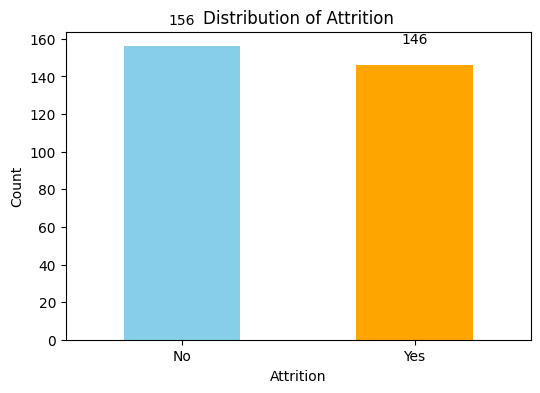

In [116]:
#Count the occurrences of each class
class_counts = data['attrition'].value_counts()

#Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
bars = class_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution of Attrition')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.xticks(rotation=0)

#Annotate the bars with churn counts
for i, count in enumerate(class_counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

plt.show()

* The visual also confirms the dataset is balanced since the absolute difference between the classes is less than 50 percent.

#### MODELING AND EVALUATION

#### Training the Balanced Dataset
In splitting the data, it is done such that;
X contains all the features except the target variable (attrition).

y contains only the target variable (attrition).

We use train_test_split to split the data into training and evaluation sets and set test_size to 0.3 which specifies that 30% of the data should be used for evaluation, while the rest is used for training.

X_train and y_train contain the training features and target variable respectively.X_eval and y_eval contain the evaluation features and target variable respectively.

In [117]:
#Define features (X) and target variable (y)
X = data.drop('attrition', axis=1) 
y = data['attrition']  

#Split the dataset into training and evaluation sets
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

In [118]:
#Instantiate encoder
encoder = LabelEncoder()

#Encode y_train
y_train_encoded = encoder.fit_transform(y_train)

#Encode y_test
y_eval_encoded = encoder.transform(y_eval)

In [119]:
#Get categorical columns
categorical_columns = X.select_dtypes('object').columns

#Get numerical columns
numerical_columns = X.select_dtypes('number').columns

In [120]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#Prepare numerical pipeline
numerical_pipeline=Pipeline(steps=[
('numerical_imputer',SimpleImputer(strategy='median')),
('scaler', StandardScaler())
    
])

#Prepare categorical pipeline
categorical_pipeline=Pipeline(steps=[
    ('categorical_imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))

])

#Column transformer preparation
preprocessor=ColumnTransformer(transformers=[
    ('numerical_pipeline', numerical_pipeline,numerical_columns),
    ('categorical_pipeline', categorical_pipeline, categorical_columns)
])

In [121]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

#Define the models
model = [
    ('K-Nearest_Neighbors', KNeighborsClassifier(n_neighbors=5)),  
    ('Logistic_Regression', LogisticRegression(random_state=42)),  
    ('Support_Vector_Machine', SVC(random_state=42)),  
    ('Decision_Tree', DecisionTreeClassifier(random_state=42)),  
    ('Random_Forest', RandomForestClassifier(random_state=42)),  
    ('Gradient_Boosting', GradientBoostingClassifier(random_state=42)),  
]

# Initialize an empty dictionary to store pipelines
all_pipelines = {}

#Create a DataFrame for the metrics
metrics_output = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score'])

#Train and evaluate each model
for model_name, classifier in model:
    
    #Create pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(mutual_info_classif, k='all')),
        ('classifier', classifier),
    ])
    
    #Fit data to pipeline
    pipeline.fit(X_train, y_train_encoded)
    all_pipelines[model_name] = pipeline

    #Make predictions on the test set
    y_pred = pipeline.predict(X_eval)

    #Generate classification report for each model
    metrics = classification_report(y_eval_encoded, y_pred, output_dict=True)
    
    #Evaluate the model
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score= metrics['weighted avg']['f1-score']

    #Add metrics to metrics_output
    metrics_output.loc[len(metrics_output)] = [model_name, accuracy, precision, recall, f1_score]

In [122]:
#Display the metrics_output
metrics_output.sort_values(ascending=False, by='f1_score')

,model_name,accuracy,precision,recall,f1_score
2,Support_Vector_Machine,0.604396,0.608586,0.604396,0.595556
1,Logistic_Regression,0.582418,0.581836,0.582418,0.580997
5,Gradient_Boosting,0.582418,0.581836,0.582418,0.580997
0,K-Nearest_Neighbors,0.571429,0.571774,0.571429,0.571532
3,Decision_Tree,0.527473,0.527142,0.527473,0.527244
4,Random_Forest,0.527473,0.526064,0.527473,0.525172


#### Observation
* Support Vector Machine (SVM) shows the best performance in terms of all metrics, making it a solid candidate for the highest-performing model in the set.

* Logistic Regression and Gradient Boosting perform similarly, providing reasonable accuracy with slightly lower scores than SVM, but may still be viable options. 

* Decision Tree and Random Forest have the lowest accuracy and other metrics, which indicates they may need tuning or might not be well-suited for this dataset.

* The F1-score for all models is generally close to the accuracy, indicating balanced precision and recall for most models, with SVM having the best balance.

#### Generate a Confusion Matrix for the Models

In [123]:
#Define the models
model = [
    ('K-Nearest_Neighbors', KNeighborsClassifier(n_neighbors=5)),  
    ('Logistic_Regression', LogisticRegression(random_state=42)),  
    ('Support_Vector_Machine', SVC(random_state=42)),  
    ('Decision_Tree', DecisionTreeClassifier(random_state=42)),  
    ('Random_Forest', RandomForestClassifier(random_state=42)),  
    ('Gradient_Boosting', GradientBoostingClassifier(random_state=42)),  
]

# Initialize an empty dictionary to store pipelines
all_pipelines_c = {}

# All confusion matrix
all_confusion_matrix =  {}

#Create a DataFrame for the metrics
c_metrics_output = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score'])

#Train and evaluate each model
for model_name, classifier in model:
    
    #Create pipeline
    c_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier),
    ])
    
    #Fit data to pipeline
    c_pipeline.fit(X_train, y_train_encoded)
    all_pipelines_c[model_name] = c_pipeline

    #Make predictions on the test set
    y_pred = c_pipeline.predict(X_eval)

    #Generate classification report for each model
    c_metrics = classification_report(y_eval_encoded, y_pred, output_dict=True)
    
    #Evaluate the model
    c_accuracy = c_metrics['accuracy']
    c_precision = c_metrics['weighted avg']['precision']
    c_recall = c_metrics['weighted avg']['recall']
    c_f1_score= c_metrics['weighted avg']['f1-score']

    #Add metrics to metrics_output
    c_metrics_output.loc[len(c_metrics_output)] = [model_name, c_accuracy, c_precision, c_recall, c_f1_score]

    # Compute the confusion matrix and store it
    c_matrix = confusion_matrix(y_eval_encoded, y_pred)
    all_confusion_matrix[model_name] = c_matrix

In [124]:
# Iterate over the keys (model names) in the all_confusion_matrix dictionary
for model_name, c_matrix in all_confusion_matrix.items():
    print(f"Confusion Matrix for {model_name}:")
    print(c_matrix)

Confusion Matrix for K-Nearest_Neighbors:
[[27 20]
 [19 25]]
Confusion Matrix for Logistic_Regression:
[[30 17]
 [21 23]]
Confusion Matrix for Support_Vector_Machine:
[[35 12]
 [24 20]]
Confusion Matrix for Decision_Tree:
[[26 21]
 [22 22]]
Confusion Matrix for Random_Forest:
[[28 19]
 [24 20]]
Confusion Matrix for Gradient_Boosting:
[[30 17]
 [21 23]]


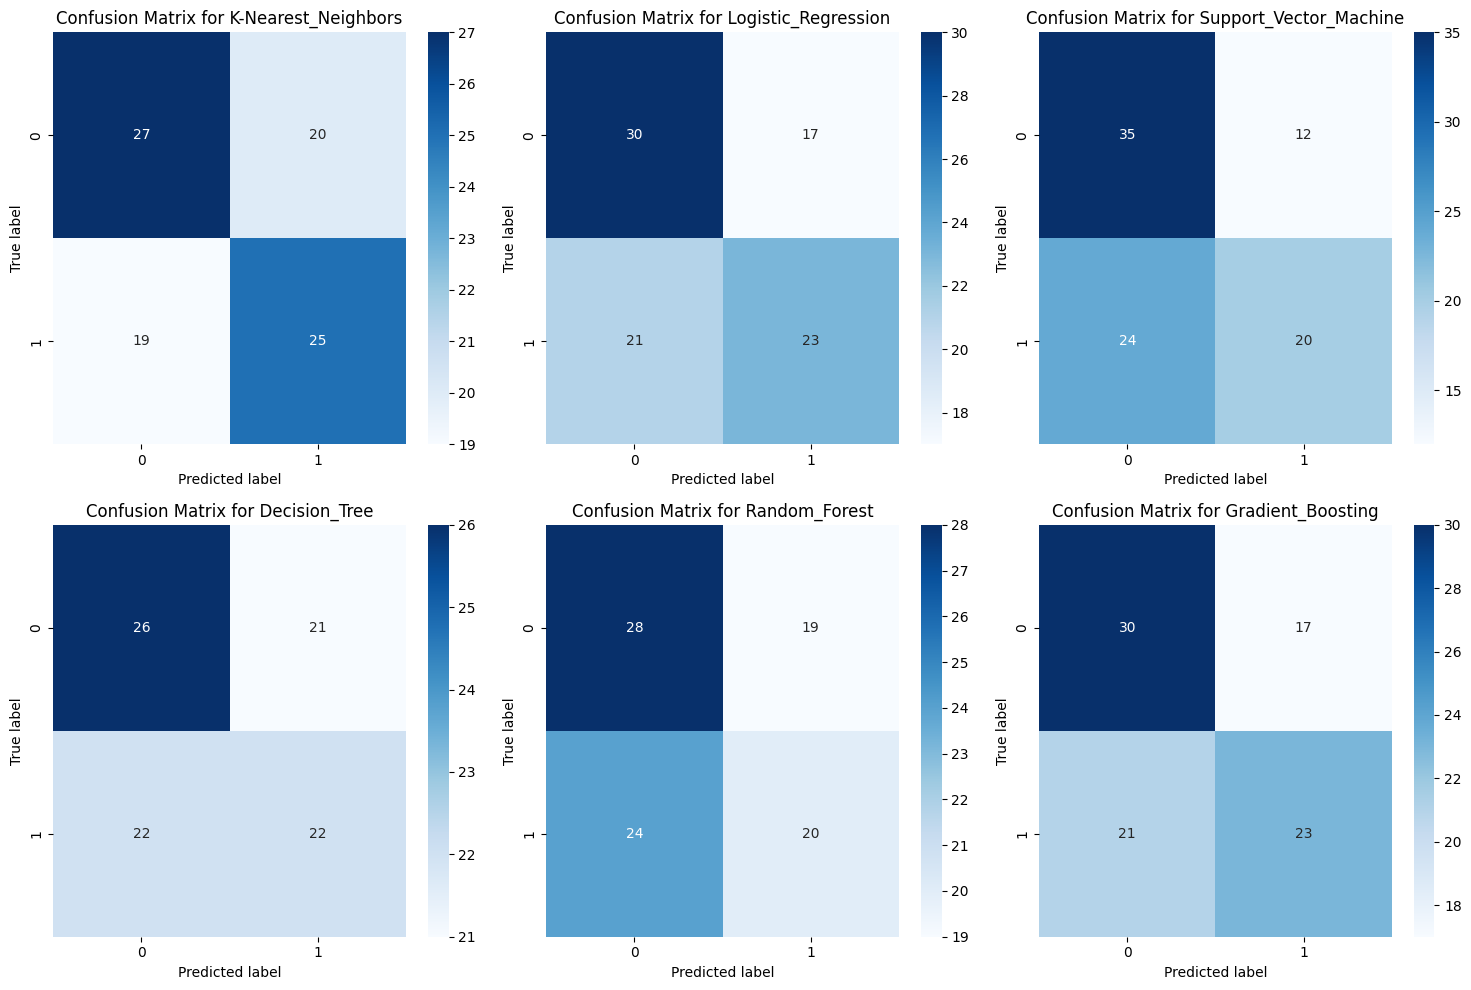

In [125]:
# Plot confusion matrices using heatmaps
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, (model, c_matrix) in enumerate(all_confusion_matrix.items()):
    ax = axes[i // 3, i % 3]
    sns.heatmap(c_matrix, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f"Confusion Matrix for {model}")
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')

plt.tight_layout()
plt.show()

#### Observation
* K-Nearest Neighbors and Support Vector Machine both show relatively high false negatives, meaning they are more likely to miss true positives.

* Logistic Regression and Gradient Boosting have a more balanced error rate between false positives and false negatives, performing slightly better overall.

* Random Forest and Decision Tree also perform similarly but tend to have higher false negatives, especially Random Forest.

#### Visualize Evaluation Using ROC-AUC

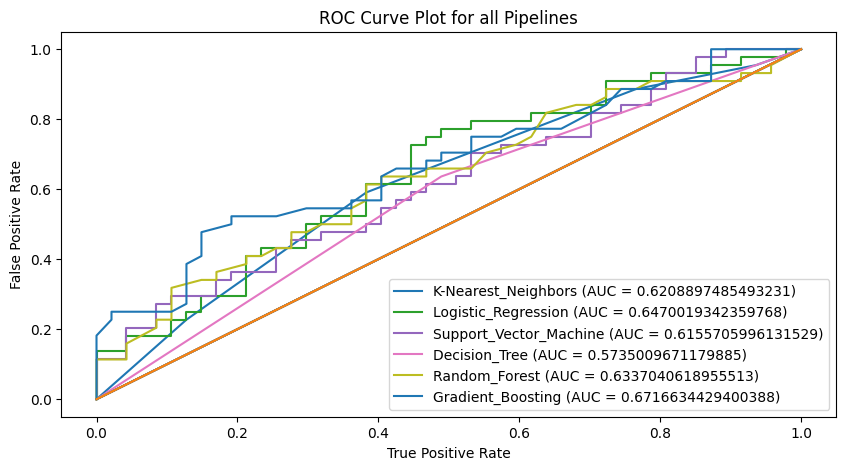

In [126]:
from sklearn.feature_selection import SelectKBest, f_classif

# Define the models
model = [
    ('K-Nearest_Neighbors', KNeighborsClassifier(n_neighbors=5)),  
    ('Logistic_Regression', LogisticRegression(random_state=42)),  
    ('Support_Vector_Machine', SVC(random_state=42, probability=True)),  # Set probability=True
    ('Decision_Tree', DecisionTreeClassifier(random_state=42)),  
    ('Random_Forest', RandomForestClassifier(random_state=42)),  
    ('Gradient_Boosting', GradientBoostingClassifier(random_state=42)),  
]

all_pipelines_c = {}

# Create a DataFrame for the metrics
c_metrics_output = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score'])

# Train and evaluate each model
for model_name, classifier in model:
    
    # Create pipeline with feature selection
    c_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(score_func=f_classif, k=5)),
        ('classifier', classifier)
    ])
    
    # Fit data to pipeline
    c_pipeline.fit(X_train, y_train_encoded)
    all_pipelines_c[model_name] = c_pipeline

    # Make predictions on the test set
    y_pred = c_pipeline.predict(X_eval)

    # Generate classification report for each model
    c_metrics = classification_report(y_eval_encoded, y_pred, output_dict=True)
    
    # Evaluate the model
    c_accuracy = c_metrics['accuracy']
    c_precision = c_metrics['weighted avg']['precision']
    c_recall = c_metrics['weighted avg']['recall']
    c_f1_score= c_metrics['weighted avg']['f1-score']

    # Add metrics to metrics_output
    c_metrics_output.loc[len(c_metrics_output)] = [model_name, c_accuracy, c_precision, c_recall, c_f1_score]

# Plot roc_curves
fig, ax = plt.subplots(figsize=(10, 5))
all_roc_data = {}

for model_name, c_pipeline in all_pipelines_c.items():

    y_score = c_pipeline.predict_proba(X_eval)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_eval_encoded, y_score)
    
    roc_auc = auc(fpr,tpr)

    roc_data = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr, 'Threshold': thresholds})

    all_roc_data[model_name] = roc_data

    ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc})')

    ax.plot([0,1], [0,1])

    ax.set_ylabel('False Positive Rate')
    
    ax.set_xlabel('True Positive Rate')


ax.set_title('ROC Curve Plot for all Pipelines')
plt.legend()
plt.show()

* Based on the provided AUC (Area Under the ROC Curve) values, the best performing models are;
1. Gradient Boosting
2. Logistic Regression
3. Random_Forest

* These models have higher AUC values, indicating better overall performance in terms of the trade-off between true positive rate and false positive rate. 
* We will select Gradient Boosting and Logistic Regression as the best performing models, and perform threshold optimization as well as hyperparameter tunin on these two models. 

#### Threshold Optimization

In [127]:
# Preview of the threshold for Gradient Boosting
all_roc_data['Gradient_Boosting'].loc[10:,]

,False Positive Rate,True Positive Rate,Threshold
10,0.148936,0.431818,0.713986
11,0.148936,0.477273,0.708967
12,0.191489,0.500000,0.706451
13,0.191489,0.522727,0.674208
14,0.255319,0.522727,0.585328
15,0.297872,0.545455,0.580466
16,0.340426,0.545455,0.572458
17,0.361702,0.545455,0.551201
18,0.361702,0.568182,0.540902
19,0.404255,0.568182,0.495992


In [128]:
#Preview the Gradient Boosting pipeline
GradientBoostingClassifier_pipeline = all_pipelines['Gradient_Boosting']
GradientBoostingClassifier_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('numerical_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'education_level', 'environment_satisfaction',
       'job_satisfaction', 'gross_salary', 'work_life_balance',
       'length_of_service'],
      dtype='object')),
                                                 ('categorical...
                                                  Pipeline(steps=[('categorical_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  Index(['department', 'education_field', 'marital_status'], dtype='object'))])),
                ('feature_selection',
                 SelectKBest(k='all',
                             score_func=<function mutual_info_classif at 0x0000023CD6D85E40>)),
                ('classifier', GradientBoostingClassifier(random_state=42))])

In [129]:
# Best threshold
gradient_threshold = 0.2

# Predict probabilities
y_pred_proba = GradientBoostingClassifier_pipeline.predict_proba(X_eval)[:, 1]

# Make predictions based on the threshold
predictions = (y_pred_proba > gradient_threshold).astype(int)

# Compute confusion matrix
gradient_threshold_matrix = confusion_matrix(y_eval_encoded, predictions)

# Saving the best model and threshold in variables
best_gradient_boosting_model = GradientBoostingClassifier_pipeline
best_gradient_threshold = gradient_threshold

# Print the confusion matrix
print(gradient_threshold_matrix)

[[11 36]
 [ 2 42]]


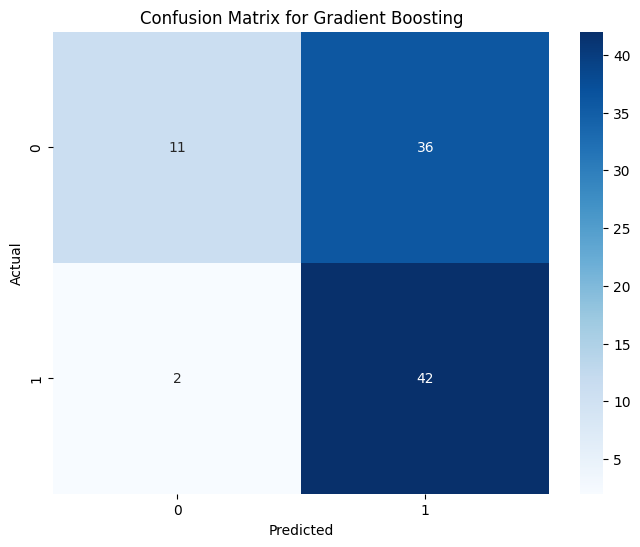

In [130]:
# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(gradient_threshold_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [131]:
# Preview of the threshold for Gradient Boosting
all_roc_data['Logistic_Regression'].loc[10:,]

,False Positive Rate,True Positive Rate,Threshold
10,0.148936,0.295455,0.604252
11,0.212766,0.295455,0.558737
12,0.212766,0.409091,0.534776
13,0.234043,0.409091,0.531922
14,0.234043,0.431818,0.531311
15,0.297872,0.431818,0.523152
16,0.297872,0.500000,0.509657
17,0.319149,0.500000,0.509576
18,0.319149,0.522727,0.507959
19,0.382979,0.522727,0.487763


In [132]:
#Preview the logistic regression pipeline
LogisticRegression_pipeline = all_pipelines['Logistic_Regression']
LogisticRegression_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('numerical_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'education_level', 'environment_satisfaction',
       'job_satisfaction', 'gross_salary', 'work_life_balance',
       'length_of_service'],
      dtype='object')),
                                                 ('categorical...
                                                  Pipeline(steps=[('categorical_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  Index(['department', 'education_field', 'marital_status'], dtype='object'))])),
                ('feature_selection',
                 SelectKBest(k='all',
                             score_func=<function mutual_info_classif at 0x0000023CD6D85E40>)),
                ('classifier', LogisticRegression(random_state=42))])

In [133]:
# Best threshold
LR_threshold = 0.2

# Predict probabilities
y_pred_proba = LogisticRegression_pipeline.predict_proba(X_eval)[:, 1]

# Make predictions based on the threshold
predictions = (y_pred_proba > LR_threshold).astype(int)

# Compute confusion matrix
LR_threshold_matrix = confusion_matrix(y_eval_encoded, predictions)

# Saving the best model and threshold in variables
best_logistic_regression_model = LogisticRegression_pipeline
best_LR_threshold = LR_threshold
LR_threshold_matrix

array([[ 7, 40],
       [ 3, 41]])

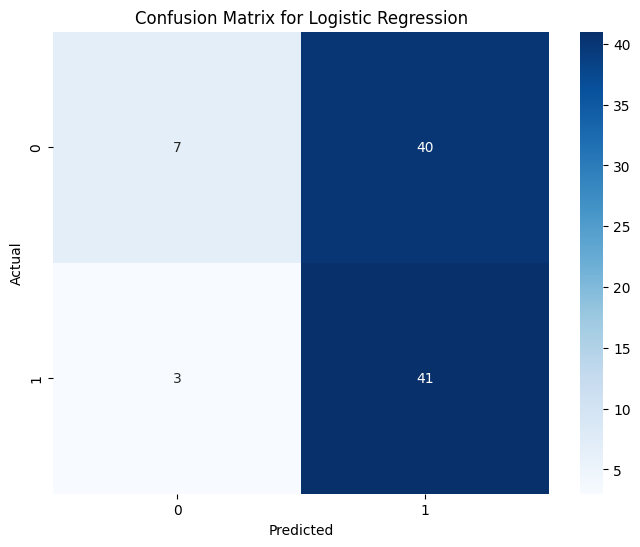

In [134]:
# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(LR_threshold_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### HYPERPARAMETER TUNING TO IMPROVE MODEL PERFORMANCE

We will perform hyperparameter tuning on the two best performing models to improve their performance thus Gradient Boosting and Logistic Regression.

#### Hypertuning Gradient Boosting Model.

In [135]:
#Load the saved GradientBoostingClassifier pipeline
current_params = best_gradient_boosting_model.get_params()
current_params

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('numerical_pipeline',
                                    Pipeline(steps=[('numerical_imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('scaler', StandardScaler())]),
                                    Index(['age', 'education_level', 'environment_satisfaction',
          'job_satisfaction', 'gross_salary', 'work_life_balance',
          'length_of_service'],
         dtype='object')),
                                   ('categorical_pipeline',
                                    Pipeline(steps=[('categorical_imputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('encoder',
                                                     OneHotEncoder(drop='first',
                                                    

In [136]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [100, 200, 300],   # Number of trees
    'classifier__learning_rate': [0.01, 0.1, 0.05],  # Learning rate
    'classifier__max_depth': [3, 5, 7],  # Depth of trees
    'classifier__min_samples_split': [2, 5, 10],  # Minimum samples for node split
    'classifier__min_samples_leaf': [1, 2, 4],  # Minimum samples at leaf
    'classifier__subsample': [0.8, 1.0],  # Fraction of samples used for training each tree
}

# Create the pipeline (your existing pipeline)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # ColumnTransformer for preprocessing
    ('feature_selection', SelectKBest(score_func=mutual_info_classif, k='all')),  # Feature selection
    ('classifier', GradientBoostingClassifier(random_state=42))  # Classifier
])

# Initialize GridSearchCV with the pipeline and parameter grid
grid_search = GridSearchCV(estimator=pipeline, 
                           param_grid=param_grid, 
                           cv=5,  # 5-fold cross-validation
                           scoring='accuracy',  # Evaluation metric
                           verbose=2,  # Print detailed progress
                           n_jobs=-1)  # Use all available cores

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train_encoded)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters: ", best_params)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


c:\Users\AndyMore\OneDrive - Azubi Africa\Git & Github\Employee-Attrition-Predictor\new_venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Hyperparameters:  {'classifier__learning_rate': 0.05, 'classifier__max_depth': 7, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200, 'classifier__subsample': 1.0}


In [137]:
# Initialize a DataFrame to store the results
tuned_models_df = pd.DataFrame(columns=['Model name', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

all_pipelines_c[model_name] = best_model

# Evaluate the best model on the test set
y_pred = best_model.predict(X_eval)

# Store classification report values as a dictionary
tuned_metrics = classification_report(y_eval_encoded, y_pred, output_dict=True)

# Grab values from the metric dictionary
accuracy = tuned_metrics['accuracy']
precision = tuned_metrics['weighted avg']['precision']
recall = tuned_metrics['weighted avg']['recall']
f1 = tuned_metrics['weighted avg']['f1-score']
    
# Add these values to the table
tuned_models_df.loc[len(tuned_models_df)] = [model_name, accuracy, precision, recall, f1]

# Sort table to have highest f1 on top
tuned_models_df.sort_values(by='F1-Score', ascending=False, inplace=True)

#Display the results
print(tuned_models_df)

          Model name  Accuracy  Precision    Recall  F1-Score
0  Gradient_Boosting  0.527473   0.527828  0.527473  0.527587


#### Use the tuned Gradient Boosting model to determine the trade-offs


In [138]:
# Best threshold
gradient_threshold = 0.2

# Predict probabilities
y_pred_proba = best_model.predict_proba(X_eval)[:, 1]

# Make predictions based on the threshold
predictions = (y_pred_proba > gradient_threshold).astype(int)

# Compute confusion matrix
gradient_threshold_matrix = confusion_matrix(y_eval_encoded, predictions)

# Saving the best model and threshold in variables
best_gradient_boosting_model = best_model
best_gradient_threshold = gradient_threshold

# Print the confusion matrix
print(gradient_threshold_matrix)

[[18 29]
 [11 33]]
